<a href="https://colab.research.google.com/github/DorohovaM/ComputerMathematicsSystems/blob/main/Var15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **15. Матричное умножение**

Вычисление элементов произведения $C$ двух квадратных матриц $A = (a_{ij})$ и $B = (b_{ij})$ по формулам

\begin{align}
c_{ij} = \sum_{k=1}^n a_{ik} b_{kj} \qquad (i = 1, 2, ..., n; j = 1, 2, ..., n)
\end{align}

легко реализуется с помощью трех вложенных циклов: по $i$, по $j$ и по $k$. Различные варианты алгоритма можно получить перестановкой циклов. Напишите шесть функций `multijk`, `multikj`, `multjik`, ..., реализующих каждый из этих вариантов. Для серии случайно сгенерированных матриц больших размеров замерьте время, требуемое этими функциями и стандартной операцией `@`. Нарисуйте графики зависимости времени от порядка матриц. Объясните, почему требуется различное время на выполнение каждой из написанных вами функций.

# **Решение**

Для начала импортируем необходимые библиотеки

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

 Далее напишем все 6 функций `mult`

 ### Функции **mult**

In [55]:
def multijk (n, A, B):
    start_time = time.time()
    C = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                C[i, j] += A[i, k] * B[k, j]
    calculation_time = time.time() - start_time
    return calculation_time

In [56]:
def multikj (n, A, B):
    start_time = time.time()
    C = np.zeros((n, n))
    for i in range(0, n):
        for k in range(0, n):
            for j in range(0, n):
                C[i, j] += A[i, k] * B[k, j]
    calculation_time = time.time() - start_time
    return calculation_time

In [57]:
def multjik (n, A, B):
    start_time = time.time()
    C = np.zeros((n, n))
    for j in range(0, n):
        for i in range(0, n):
            for k in range(0, n):
                C[i, j] += A[i, k] * B[k, j]
    calculation_time = time.time() - start_time
    return calculation_time

In [58]:
def multjki (n, A, B):
    start_time = time.time()
    C = np.zeros((n, n))
    for j in range(0, n):
        for k in range(0, n):
            for i in range(0, n):
                C[i, j] += A[i, k] * B[k, j]
    calculation_time = time.time() - start_time
    return calculation_time

In [59]:
def multkij (n, A, B):
    start_time = time.time()
    C = np.zeros((n, n))
    for k in range(0, n):
        for i in range(0, n):
            for j in range(0, n):
                C[i, j] += A[i, k] * B[k, j]
    calculation_time = time.time() - start_time
    return calculation_time

In [60]:
def multkji (n, A, B):
    start_time = time.time()
    C = np.zeros((n, n))
    for k in range(0, n):
        for j in range(0, n):
            for i in range(0, n):
                C[i, j] += A[i, k] * B[k, j]
    calculation_time = time.time() - start_time
    return calculation_time

### Функция **main**

Сгенерируем матрицы максимально нужного размера

In [61]:
n = 300
A = np.random.rand(n, n)
B = np.random.rand(n, n)

Проведем инициализацию значений массивов, в которые будут занесены данные о выполнении функций

In [62]:
ijk = np.zeros(10)
ikj = np.zeros(10)
jik = np.zeros(10)
jki = np.zeros(10)
kij = np.zeros(10)
kji = np.zeros(10)
matmul_t = np.zeros(10)

Теперь заполним данные о выполнении вычислений для всех функций

In [63]:
num = 0
for n in range (10, 301, 30):
    a = A[:n, :n]
    b = B[:n, :n]

    ijk[num] = multijk(n, a, b)
    ikj[num] = multikj(n, a, b)
    jik[num] = multjik(n, a, b)
    jki[num] = multjki(n, a, b)
    kij[num] = multkij(n, a, b)
    kji[num] = multkji(n, a, b)

    start_time = time.time()
    C = a @ b
    calculation_time = time.time() - start_time
    matmul_t[num] = calculation_time

    num += 1

Остаётся только написовать график и проанализировать результаты

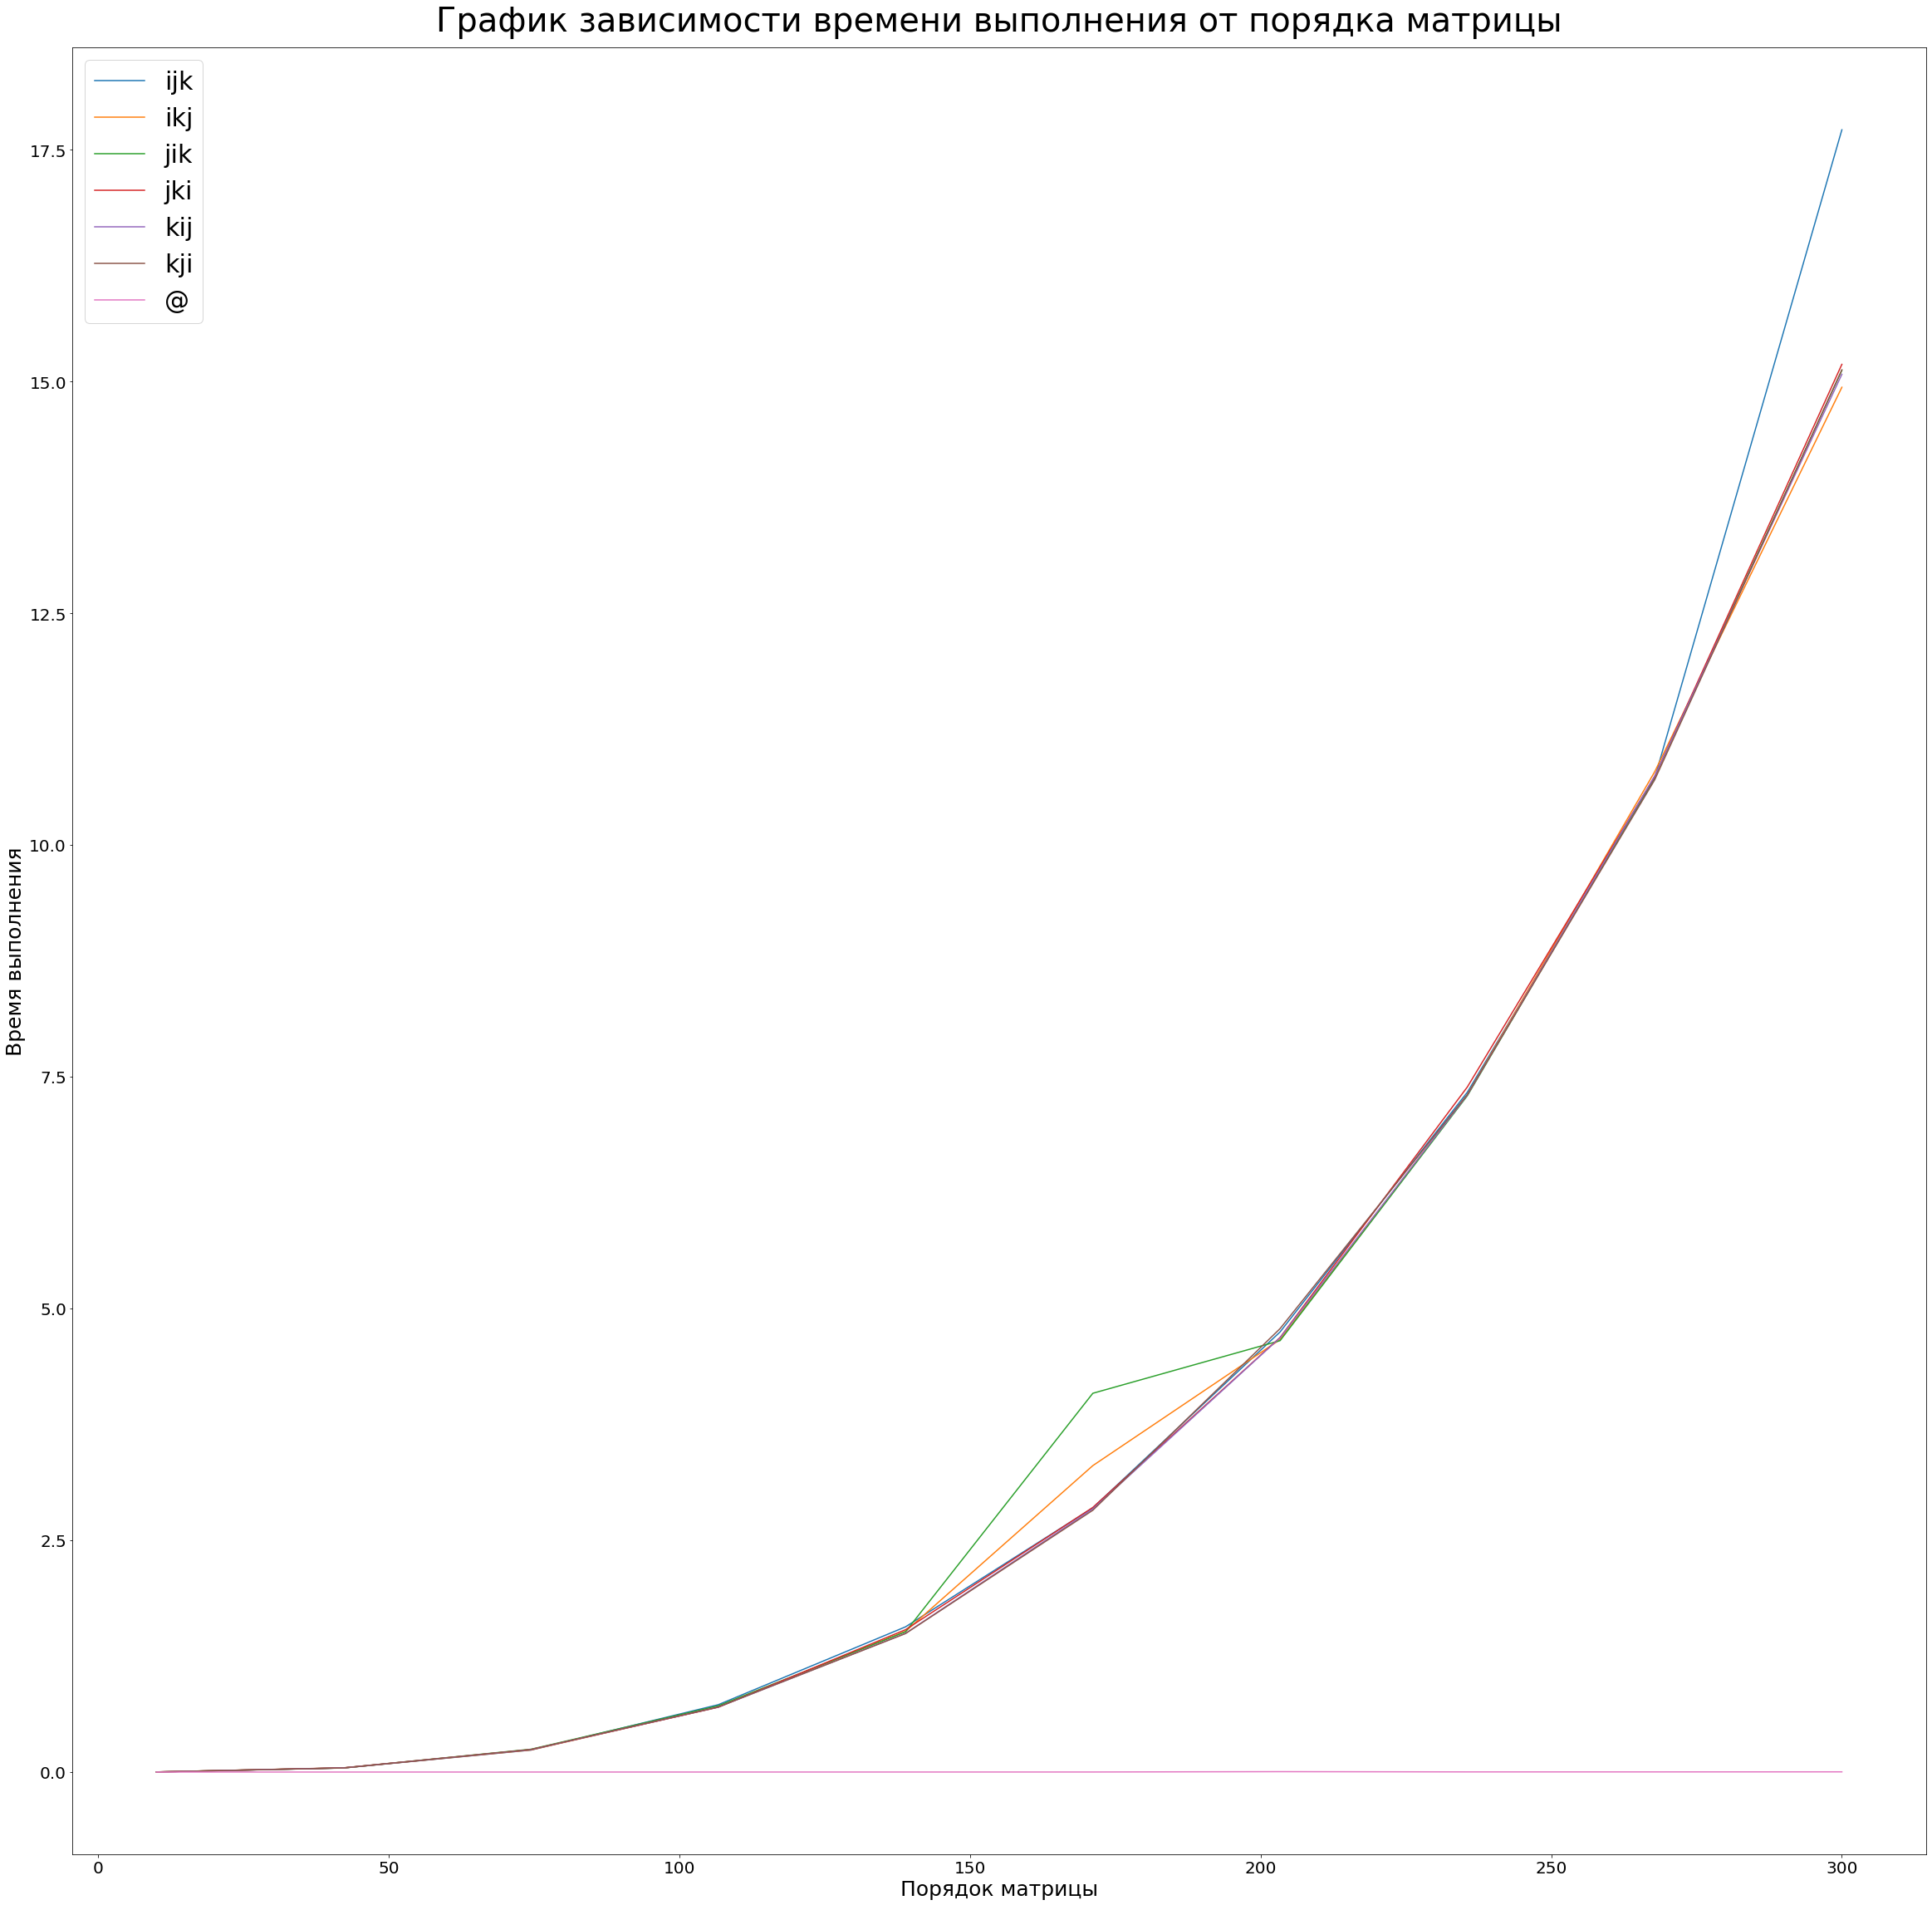

In [86]:
X = np.linspace(10, 300, 10)

plt.figure(figsize=(40, 40))
plt.plot(X, ijk, label='ijk')
plt.plot(X, ikj, label='ikj')
plt.plot(X, jik, label='jik')
plt.plot(X, jki, label='jki')
plt.plot(X, kij, label='kij')
plt.plot(X, kji, label='kji')
plt.plot(X, matmul_t, label='@')
plt.legend(loc = 'best', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Порядок матрицы', fontsize = 25)
plt.ylabel('Время выполнения', fontsize = 25)
plt.title('График зависимости времени выполнения от порядка матрицы', fontsize = 40, pad = 20)


pass

# **Вывод**

Из графика можно заметить, что данные по выполнению функций mult почти идентичны виду того, что они одинаковы по своему принципу работы: в них последовательно производятся $n^3$ операций. Оператор @, или же matmul, в свою очередь разбивает основную задачу на подзадачи, что позволяет вычислять их одновременно, что увеличивает мощность и, как следствие, уменьшает время вычислений.